In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve

from statistics import mean

### **Data Importing and Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Test_file.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### **Exploratory Data Analysis**

When it comes to Age feature, we can see the plot below, it's pretty close to normal distribution.

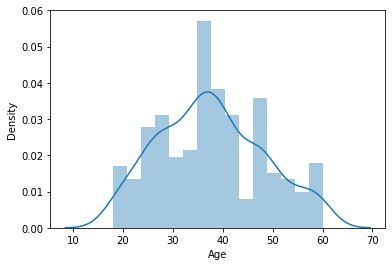

In [ ]:
sns.distplot(a= data['Age'],bins=15, hist=True)

Distribution of Estimated Salary peaks at 75000, and max value is 150000.

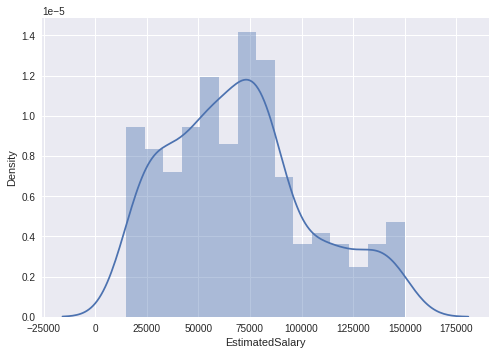

In [ ]:
sns.distplot(a= data['EstimatedSalary'],bins=15, hist=True)
plt.show()

We can see from two plots below, people at the age of 40-50 are most likely to purchase our products, while the youngers at the age of 28-40 seems to pay less attention to.

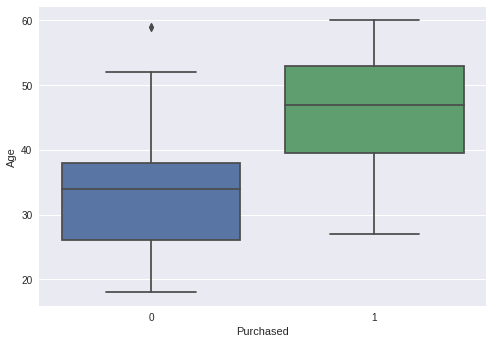

In [ ]:
sns.boxplot(x= 'Purchased', y = 'Age', data = data)
plt.show()

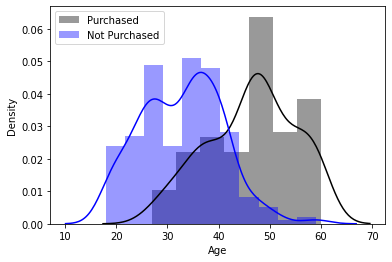

In [ ]:
sns.distplot(data.loc[data['Purchased'] ==1 , 'Age'], color='black', label='Purchased')
sns.distplot(data.loc[data['Purchased'] == 0, 'Age'], color='blue', label='Not Purchased')
plt.legend()

Considering Estimated Salary, people with medium salary are not interested in our products. We can see this trend more details in the next plot.

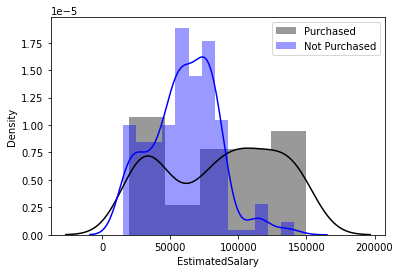

In [ ]:
sns.distplot(data.loc[data['Purchased'] ==1 , 'EstimatedSalary'], color='black', label='Purchased')
sns.distplot(data.loc[data['Purchased'] == 0, 'EstimatedSalary'], color='blue', label='Not Purchased')
plt.legend()

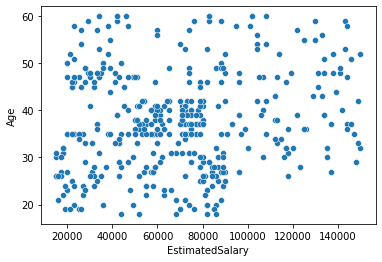

In [ ]:
sns.scatterplot(x = data['EstimatedSalary'], y = data['Age'])

In [ ]:
conditions_salary = [
    (data['EstimatedSalary'] > 0) & (data['EstimatedSalary'] < 25000),
    (data['EstimatedSalary'] >= 25000) & (data['EstimatedSalary'] < 50000),
    (data['EstimatedSalary'] >= 50000) & (data['EstimatedSalary'] < 75000),
    (data['EstimatedSalary'] >= 75000) & (data['EstimatedSalary'] < 100000),
    (data['EstimatedSalary'] >=100000) & (data['EstimatedSalary'] <125000),
    (data['EstimatedSalary'] >=125000)]

# create a list of the values we want to assign for each condition
values = ['Very Low', 'Low', 'Medium','Moderately High', 'High', 'Very High']
data['SalaryBin'] = np.select(conditions_salary, values)

In [ ]:
data.head(5)

,Age,EstimatedSalary,Purchased,SalaryBin
0,19,19000,0,Very Low
1,35,20000,0,Very Low
2,26,43000,0,Low
3,27,57000,0,Medium
4,19,76000,0,Moderately High


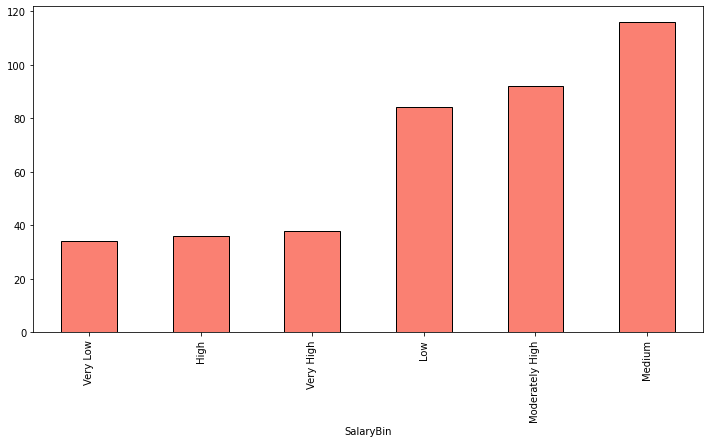

In [ ]:
plt.figure(figsize = (12,6))
data.groupby('SalaryBin').count()['Age'].sort_values().plot(kind='bar',color='salmon',edgecolor='k')
plt.show()

Observation: We can see that people with medium salary are the most crowded in our dataset.

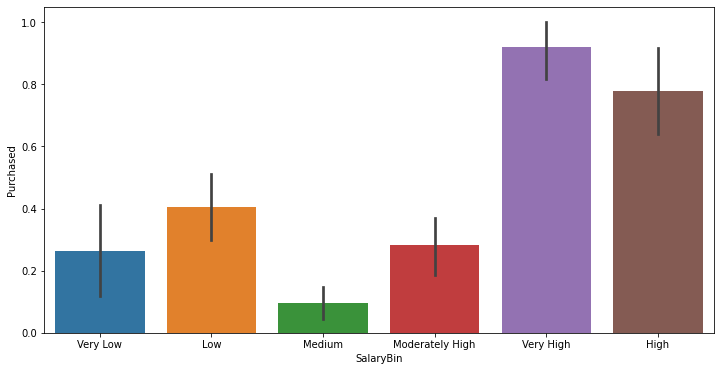

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'SalaryBin', y ='Purchased',data = data)
plt.show()

While medium income people are the most densed but they are least willing to pay for our products.

### **Data Modeling** 

In [ ]:
#train test split
X = data.loc[:, ~data.columns.isin(['Purchased', 'SalaryBin'])]
y = data.loc[:, 'Purchased']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [ ]:
#try different algorithms
clf_dict = {'knn': KNeighborsClassifier(n_neighbors=12),
            'log reg': LogisticRegression(random_state=42), 
            'naive bayes': GaussianNB(), 
            'linear svc': LinearSVC(random_state=42),
            'sgd classifier': SGDClassifier(random_state=42),
            'ada boost': AdaBoostClassifier(n_estimators=100, random_state=42),
            'gradient boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'CART': DecisionTreeClassifier(random_state=42),
            'random forest': RandomForestClassifier(n_estimators=100, random_state=42)}
for name, clf in clf_dict.items():
    pred = clf.fit(X_train, y_train)
    y_pred = pred.predict(X_test)
    print('Accuracy of test {}:'.format(name), accuracy_score(y_pred, y_test))
    print('Accuracy of train {}:'.format(name), accuracy_score(pred.predict(X_train), y_train))


Accuracy of test knn: 0.8875
Accuracy of train knn: 0.840625
Accuracy of test log reg: 0.725
Accuracy of train log reg: 0.621875
Accuracy of test naive bayes: 0.925
Accuracy of train naive bayes: 0.878125
Accuracy of test linear svc: 0.725
Accuracy of train linear svc: 0.621875
Accuracy of test sgd classifier: 0.725
Accuracy of train sgd classifier: 0.621875
Accuracy of test ada boost: 0.925
Accuracy of train ada boost: 0.934375
Accuracy of test gradient boosting: 0.925
Accuracy of train gradient boosting: 0.971875
Accuracy of test CART: 0.9
Accuracy of train CART: 0.996875
Accuracy of test random forest: 0.925
Accuracy of train random forest: 0.996875


First glance through some classifiers:


1.   Logistic Regression Classifier, Linear SVC, SGD classifier are not a good model
2.   Naive Bayes,KNN, AdaBoost perform pretty good and stably.



### **Evaluation of Classifiers**

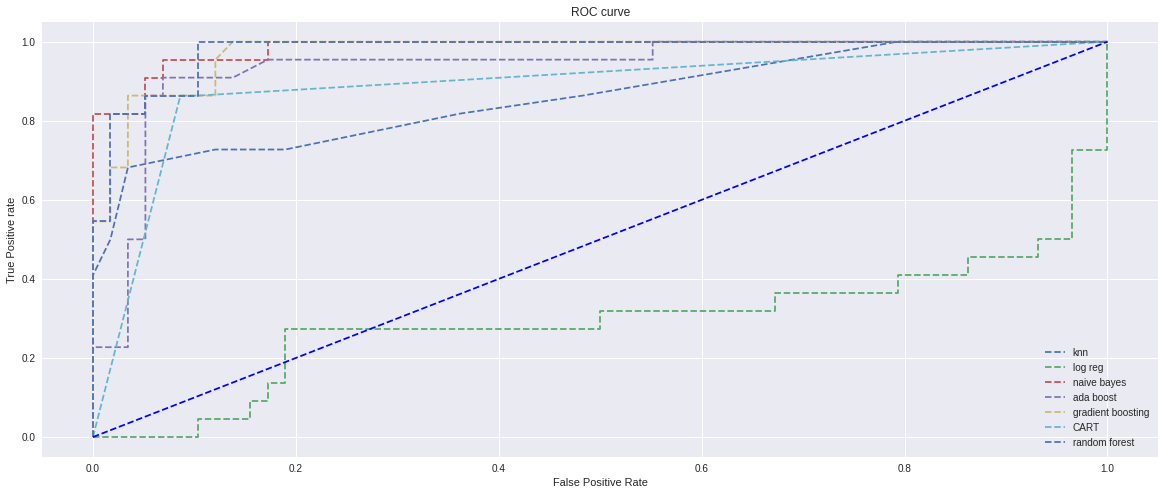

In [ ]:
#ROC Curve
from IPython.core.pylabtools import figsize
clf_dict = {'knn': KNeighborsClassifier(n_neighbors=12),
            'log reg': LogisticRegression(random_state=42), 
            'naive bayes': GaussianNB(), 
            #'linear svc': LinearSVC(random_state=42),
            #'sgd classifier': SGDClassifier(random_state=42),
            'ada boost': AdaBoostClassifier(n_estimators=100, random_state=42),
            'gradient boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'CART': DecisionTreeClassifier(random_state=42),
            'random forest': RandomForestClassifier(n_estimators=100, random_state=42)}

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.figure(figsize = (20,8))
plt.style.use('seaborn')

for name, clf in clf_dict.items():
    # roc curve for models
    pred = clf.fit(X_train, y_train)
    y_pred = pred.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred[:,1], pos_label=1)

    plt.plot(fpr1, tpr1, linestyle='--', label=name)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()   

Looking at the ROC Curve of all classifiers, we know that the higher and closer to the left side the line is, the better the classifier is. Overall, we can go for Naive Bayes, Random Forest, ADA Boosting, Gradient Boosting.